In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def showit(Title="",image=None,size=10):
  w,h=image.shape[0],image.shape[1]
  aspect_ratio=w/h
  plt.figure(figsize=(aspect_ratio*size,size))
  plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
  plt.title(Title)
  plt.show()

In [5]:
!wget https://raw.githubusercontent.com/rajeevratan84/ModernComputerVision/main/scan.jpeg

--2023-04-14 19:37:21--  https://raw.githubusercontent.com/rajeevratan84/ModernComputerVision/main/scan.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 171933 (168K) [image/jpeg]
Saving to: ‘scan.jpeg’

scan.jpeg           100%[===================>] 167.90K  --.-KB/s    in 0.03s   

2023-04-14 19:37:21 (5.94 MB/s) - ‘scan.jpeg’ saved [171933/171933]



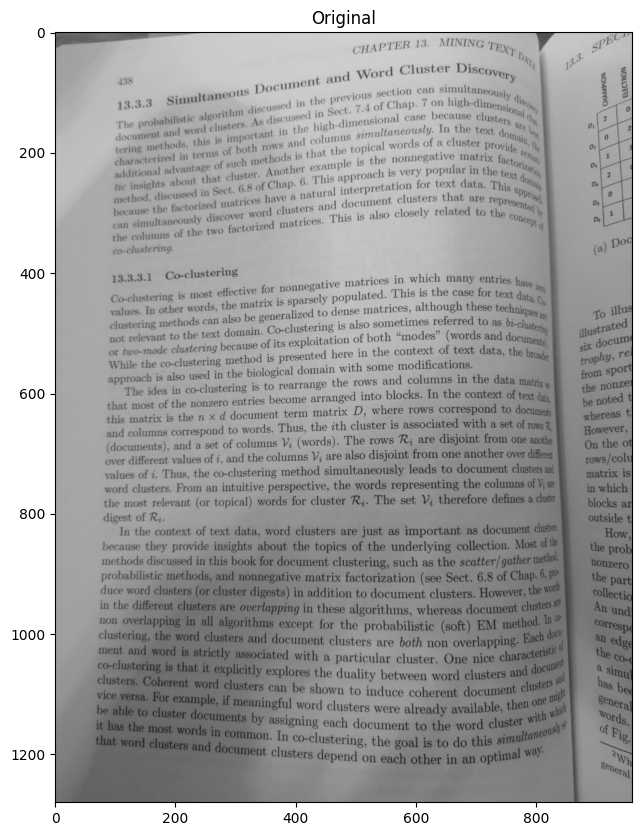

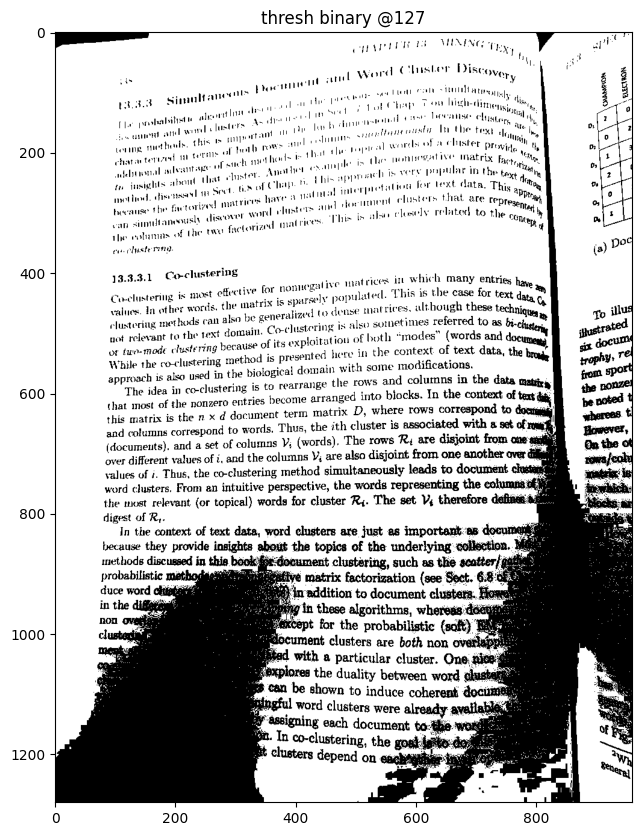

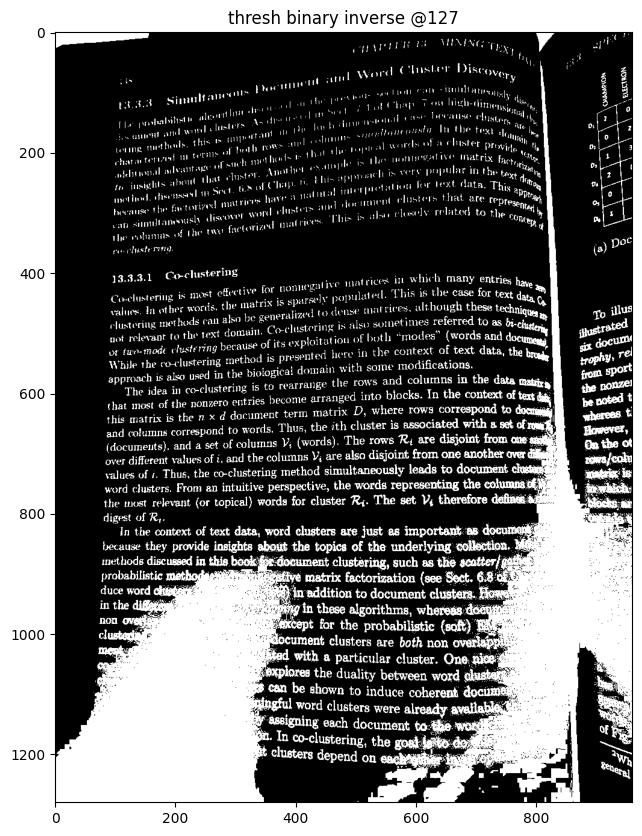

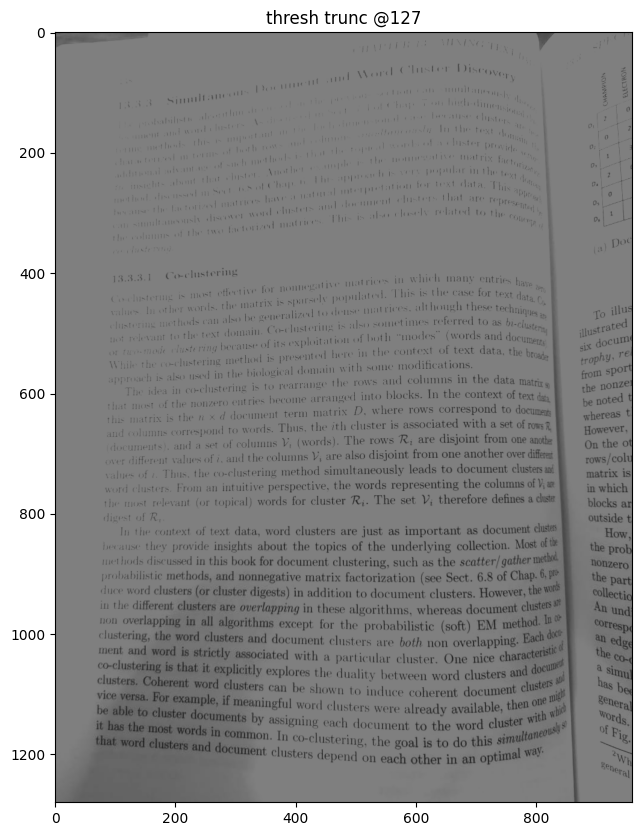

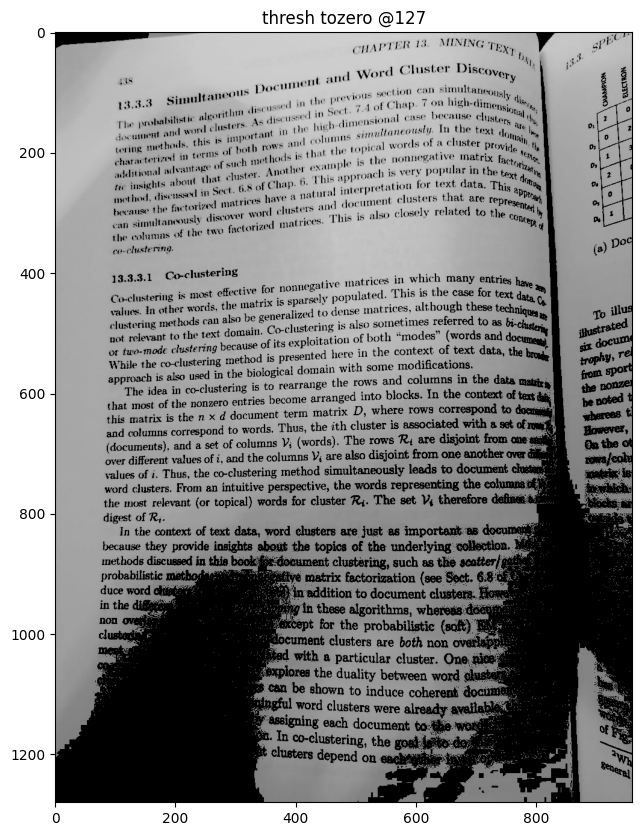

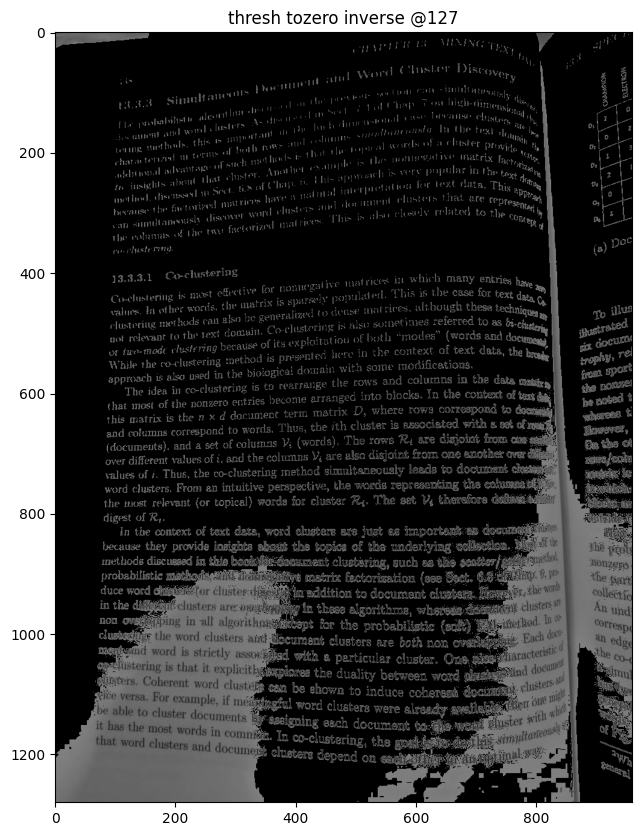

In [9]:
image = cv2.imread('scan.jpeg',0)
showit("Original", image)
ret,thresh1=cv2.threshold(image,127,255,cv2.THRESH_BINARY)
ret,thresh2=cv2.threshold(image,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3=cv2.threshold(image,127,255,cv2.THRESH_TRUNC)
ret,thresh4=cv2.threshold(image,127,255,cv2.THRESH_TOZERO)
ret,thresh5=cv2.threshold(image,127,255,cv2.THRESH_TOZERO_INV)
showit("thresh binary @127",thresh1)
showit("thresh binary inverse @127",thresh2)
showit("thresh trunc @127",thresh3)
showit("thresh tozero @127",thresh4)
showit("thresh tozero inverse @127",thresh5)

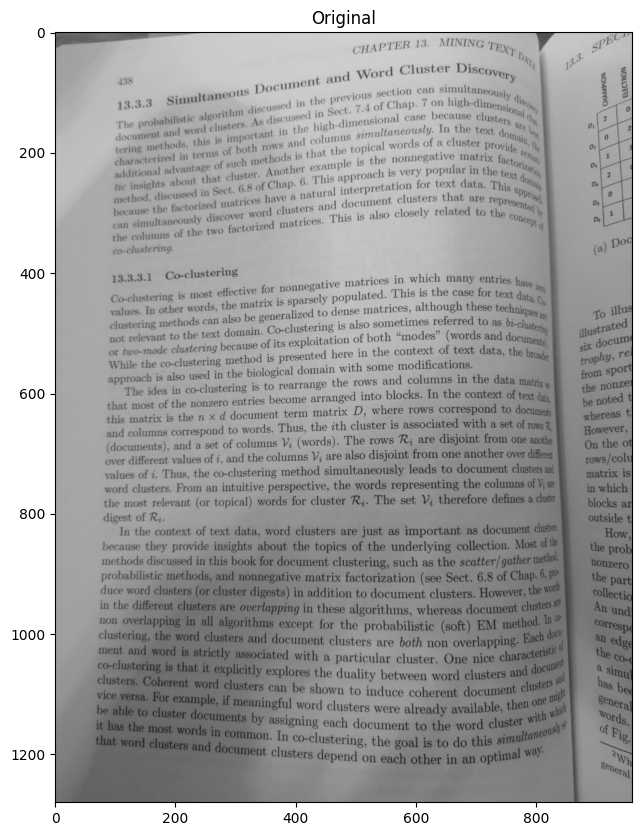

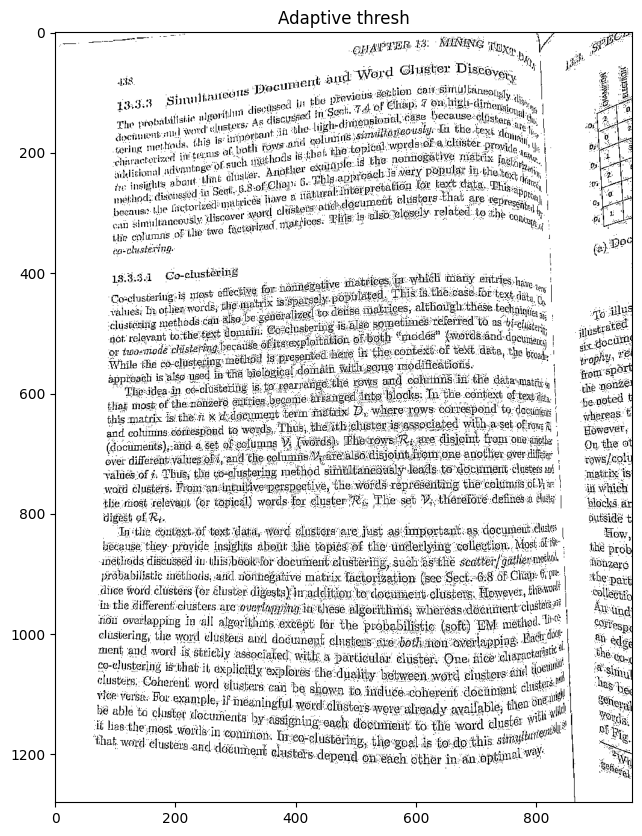

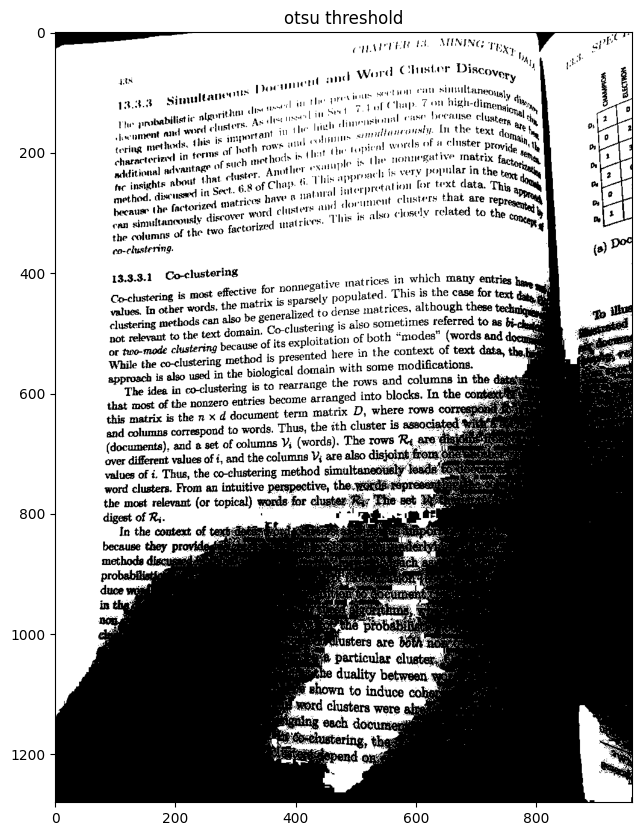

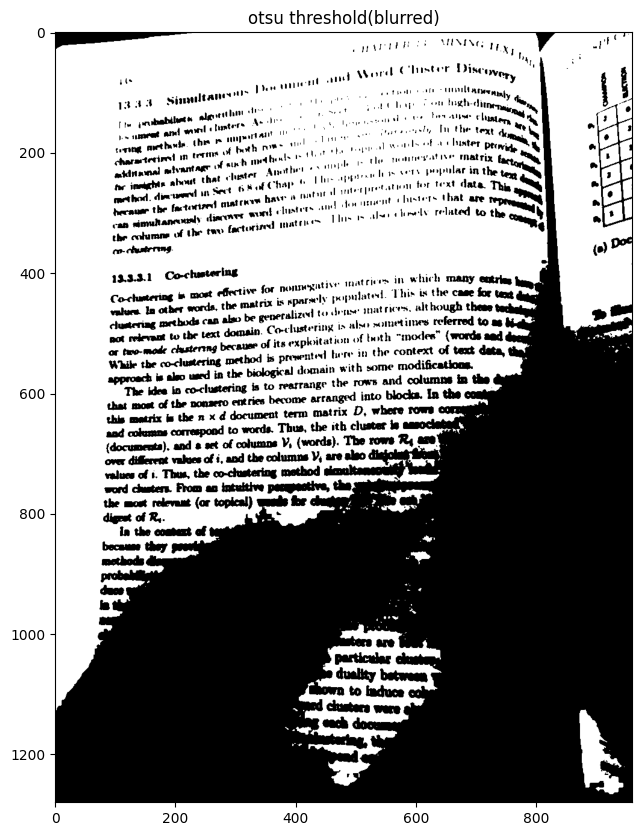

In [11]:
image = cv2.imread('scan.jpeg',0)
showit("Original", image)
#blurring images beforehand removes noise
ret,thresh1=cv2.threshold(image,127,255,cv2.THRESH_BINARY)
thresh=cv2.adaptiveThreshold(image,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,3,5)
_,thresh2=cv2.threshold(image,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
blur=cv2.GaussianBlur(image,(5,5),0)
_,thresh3=cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
showit("Adaptive thresh",thresh)
showit("otsu threshold",thresh2)
showit("otsu threshold(blurred)",thresh3)

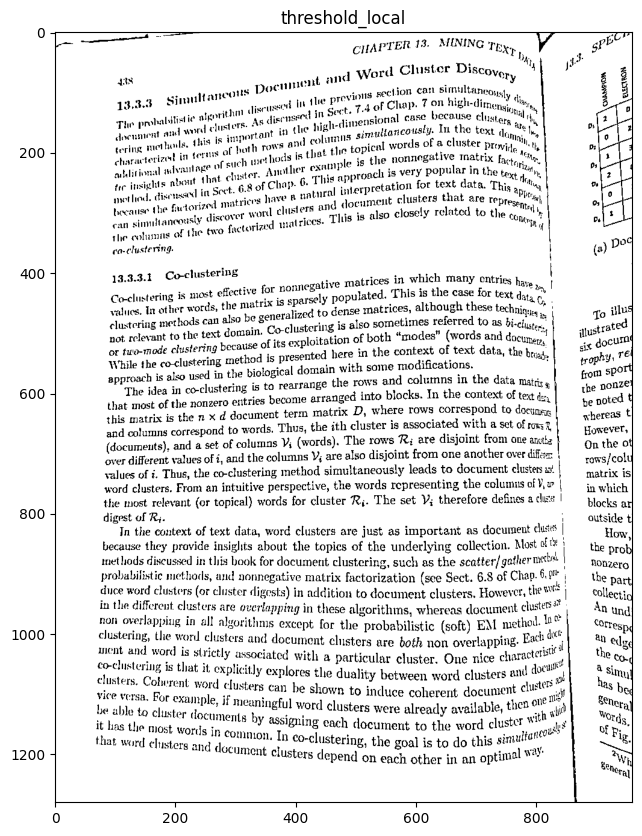

In [13]:
from skimage.filters import threshold_local
image = cv2.imread('scan.jpeg')
V=cv2.split(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))[2]
T=threshold_local(V,25,offset=15,method="gaussian")
thresh=(V>T).astype("uint8")*255
showit("threshold_local", thresh)